In [1]:
import tensorflow as tf
import keras as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

Using TensorFlow backend.


In [2]:
read_all_imgs = []
for img_path in glob.glob("/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/png/*.png"):
    img_frame = Image.open(img_path)
    split_path = img_path.split("/")
    split_format = split_path[-1].split(".")
    split_num = split_format[0].split("_")
    img_array = np.asarray(img_frame)
    img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], 1))
    read_all_imgs.append((img_array, split_num[-1]))

In [3]:
from operator import itemgetter
sorted_all_imgs = sorted(read_all_imgs, key=itemgetter(1))

all_imgs = np.array([ i for i,j in sorted_all_imgs])

# for i in range(26):
#     print(sorted_all_imgs[i][1])

In [4]:
df_labels = pd.read_csv('/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/multiclasses.txt', sep=' ', 
                        names=['blank', 'photo1', 'photo2', 'multilattice', 'ice', 'badice', 'mosaic1', 'mosaic2'])

In [5]:
df_labels.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_00001.pgm,0,1,0,0,1,0,0.892528,0.000000
fake_00002.pgm,0,0,1,1,0,0,0.581729,0.568217
fake_00003.pgm,0,1,0,0,0,0,0.508285,0.000000
fake_00004.pgm,0,1,0,0,0,0,0.852589,0.000000
fake_00005.pgm,0,0,1,0,0,0,0.762097,0.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_imgs, df_labels, test_size=0.33, random_state=42)

In [7]:
y_train.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_31986.pgm,0,1,0,1,1,1,0.710776,0.886752
fake_01706.pgm,0,1,0,0,0,0,0.770968,0.000000
fake_09435.pgm,0,0,1,0,0,0,0.512017,0.000000
fake_11359.pgm,0,1,0,0,0,0,0.810447,0.000000
fake_38172.pgm,0,1,1,1,0,0,0.588032,0.764495


In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [9]:
print("Training Images: ")
print(X_train.shape)
print(y_train.shape)
print("\n Validation Images: ")
print(X_val.shape)
print(y_val.shape)
print("\n Test Images: ")
print(X_test.shape)
print(y_test.shape)

Training Images: 
(25957, 512, 512, 1)
(25957, 8)

 Validation Images: 
(8565, 512, 512, 1)
(8565, 8)

 Test Images: 
(4220, 512, 512, 1)
(4220, 8)


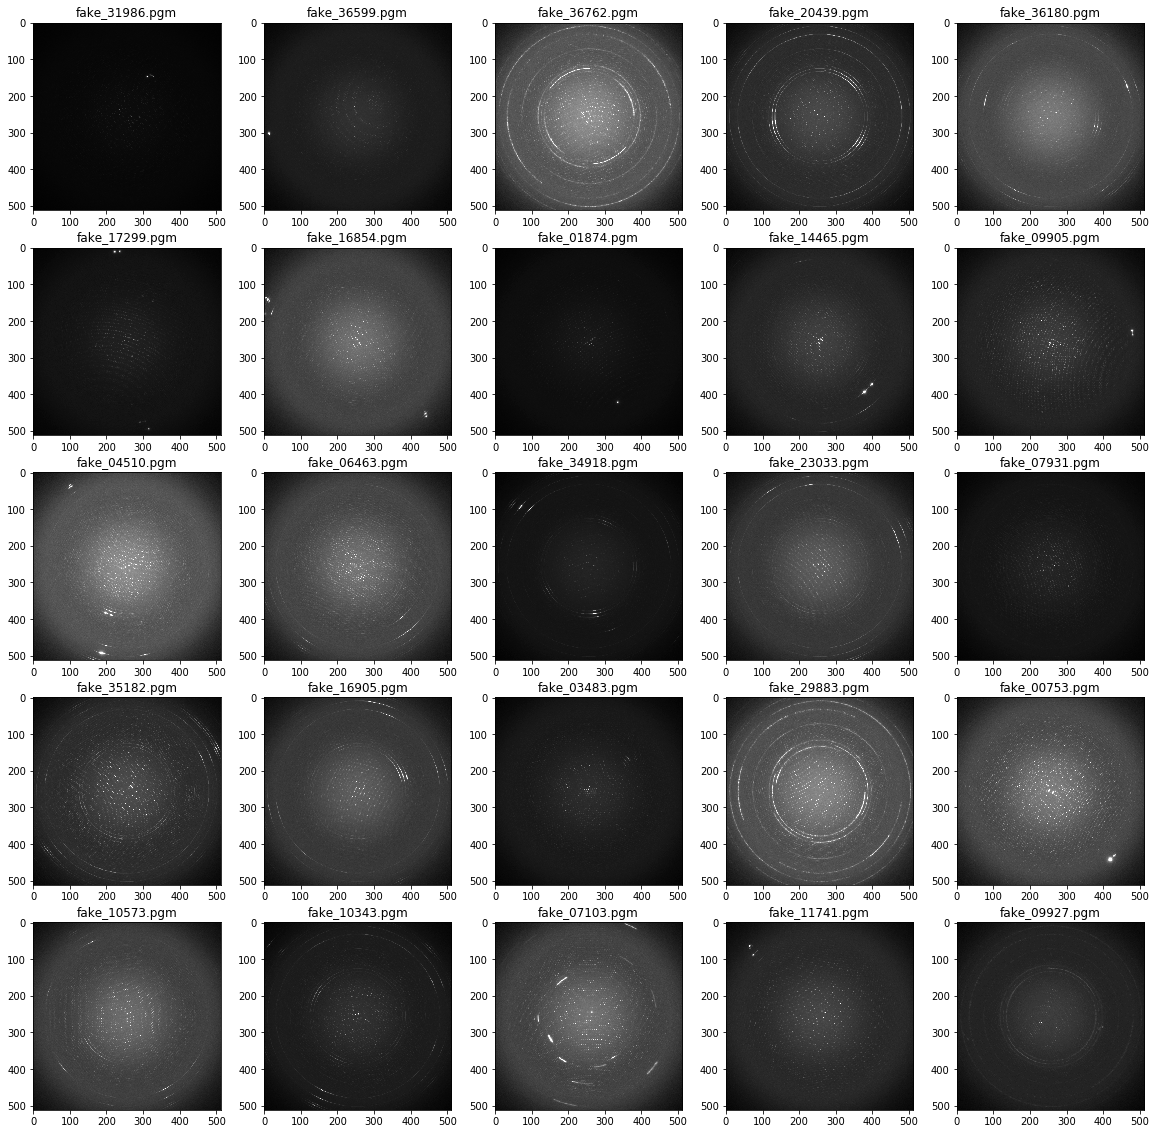

In [10]:
unique_index = pd.Index(y_train.index)
ice_true = y_train[y_train.ice == 1].index

fig = plt.figure(figsize=(20,20))
for t, name in enumerate(ice_true[:25]):
    fig.add_subplot(5, 5, t+1)
    index = unique_index.get_loc(name)
    plt.title(name)
    plt.imshow(X_train[index].reshape(X_train[index].shape[0], X_train[index].shape[1]), cmap='gray')
plt.show()

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    rescale=1./255)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [12]:
input_X = k.layers.Input(shape=(512, 512, 1), name="input")

base_model = k.models.load_model('./VGG16_categorical_try1.h5')
base_model = k.Model(inputs=base_model.input, outputs=base_model.layers[-4].output)
# print(base_model.summary())

x = base_model.output
x = k.layers.Dense(4096, activation='relu')(x)
x = k.layers.Dense(4096, activation='relu')(x)
predictions = k.layers.Dense(1, activation='sigmoid')(x)

model = k.Model(inputs=base_model.input, outputs=predictions)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
for layer in model.layers[:-12]:
    layer.trainable = False

for layer in model.layers:
    print(layer, layer.trainable)

(<keras.engine.input_layer.InputLayer object at 0x7f7be1edfd50>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1edfbd0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1edf0d0>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f7be1edfed0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1edf3d0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1edf150>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f7be1edf310>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1edf410>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1e8d850>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1e6e5d0>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f7be1e6e290>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1e6ec90>, True)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1e6e750>, True)
(<keras.layers.convolutional.Conv2D object at 0x7f7be1e6e650>, True)
(<keras.layers.poolin

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 512, 512, 1)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [15]:
model.compile(loss='binary_crossentropy',
                   optimizer=k.optimizers.Adam(0.001),
                   metrics=['acc'])

In [16]:
epochs = 20
batchsize = 32

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

train_gen = train_datagen.flow(X_train, y_train.ice, batchsize)
val_gen = train_datagen.flow(X_val, y_val.ice, batchsize)

In [17]:
# data is randomly shuffled at each epoch
# history object is a record of training and validation loss values and metrics values at successive epochs
history = model.fit_generator(train_gen, 
                    validation_data=val_gen,
                    steps_per_epoch=len(X_train) / batchsize,
                    validation_steps=len(X_val) / batchsize,
                    shuffle=True,
                    callbacks=[callback],
                    epochs=epochs)

Epoch 1/20
811/811 [==============================] - 538s 663ms/step - loss: 0.2005 - acc: 0.9467 - val_loss: 0.1035 - val_acc: 0.9809
Epoch 2/20
811/811 [==============================] - 497s 612ms/step - loss: 0.0925 - acc: 0.9802 - val_loss: 0.1277 - val_acc: 0.9843
Epoch 3/20
811/811 [==============================] - 504s 621ms/step - loss: 0.0685 - acc: 0.9861 - val_loss: 0.0612 - val_acc: 0.9870
Epoch 4/20
811/811 [==============================] - 498s 615ms/step - loss: 0.0633 - acc: 0.9873 - val_loss: 0.0605 - val_acc: 0.9877
Epoch 5/20
811/811 [==============================] - 499s 615ms/step - loss: 0.0572 - acc: 0.9879 - val_loss: 0.0547 - val_acc: 0.9896
Epoch 6/20
811/811 [==============================] - 502s 619ms/step - loss: 0.0614 - acc: 0.9884 - val_loss: 0.0574 - val_acc: 0.9878
Epoch 7/20
811/811 [==============================] - 508s 626ms/step - loss: 0.0574 - acc: 0.9886 - val_loss: 0.0549 - val_acc: 0.9887
Epoch 8/20
811/811 [============================

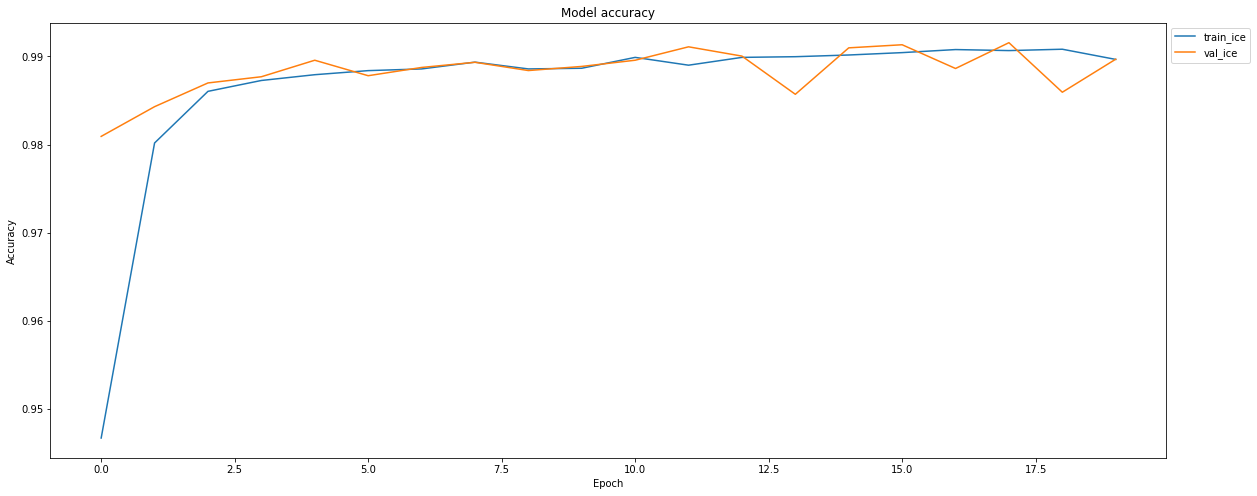

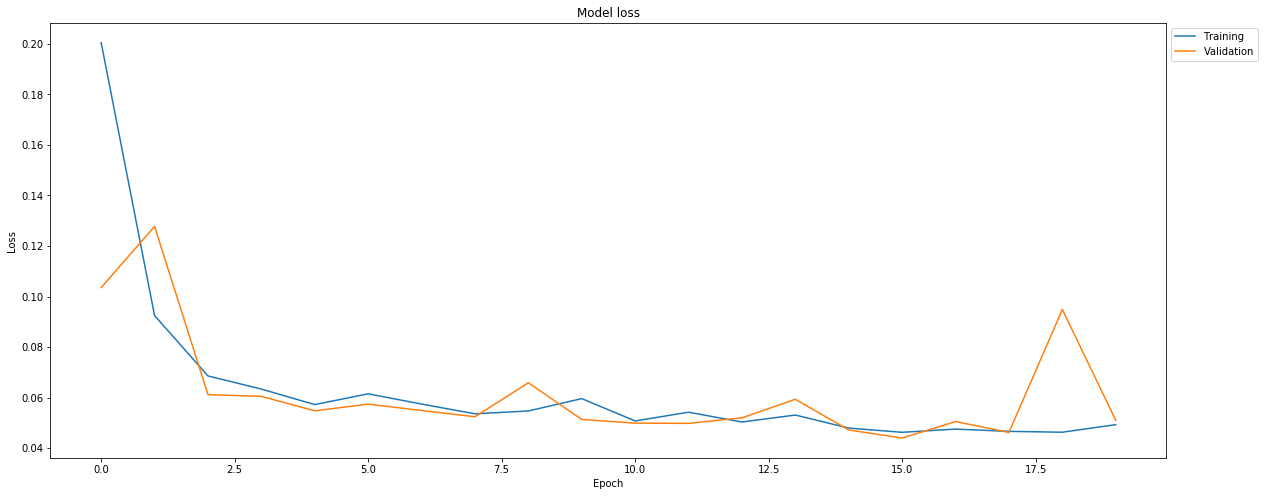

In [18]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_ice', 'val_ice'], loc='upper left',
            bbox_to_anchor=(1, 1))
plt.show()

# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
model.save('/mnt/home1/hollatz/projects/deep_learning/development/CSCL4622/VGG16_binary_ice_transfer_last_2_ConvBlock.h5')

In [19]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[[2835  399]
 [  36  950]]


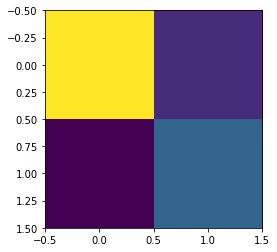

In [20]:
cm = metrics.confusion_matrix(y_test.ice.values, np.rint(predictions))
print(cm)
plt.imshow(cm)